In [122]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [123]:
df = pd.read_csv("D:\\WA_Fn-UseC_-Telco-Customer-Churn.csv", sep = ",")
churn = df.dropna(how='any')

In [124]:
churn.head()
churn.count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [125]:
for col in churn.columns:
    if churn[col].dtype == 'object':
        churn[col] = pd.Categorical(churn[col]).codes

In [126]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [127]:
churn.info()
churn.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null int16
gender              7043 non-null int8
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int8
Dependents          7043 non-null int8
tenure              7043 non-null int64
PhoneService        7043 non-null int8
MultipleLines       7043 non-null int8
InternetService     7043 non-null int8
OnlineSecurity      7043 non-null int8
OnlineBackup        7043 non-null int8
DeviceProtection    7043 non-null int8
TechSupport         7043 non-null int8
StreamingTV         7043 non-null int8
StreamingMovies     7043 non-null int8
Contract            7043 non-null int8
PaperlessBilling    7043 non-null int8
PaymentMethod       7043 non-null int8
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null int16
Churn               7043 non-null int8
dtypes: float64(1), int16(2), int64(2), int8(16)
memory usage: 357.

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [128]:
x = churn[['SeniorCitizen', 'Dependents',
       'tenure', 'PhoneService', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','MultipleLines',
        'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges']]

y = churn['Churn']
       
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(5282, 14)

(1761, 14)

(5282,)

(1761,)

pandas.core.frame.DataFrame

In [129]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [130]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [131]:
log.coef_

array([[ 0.24641082, -0.0682335 , -0.03566752, -0.92880394,  0.26086559,
        -0.26066075, -0.12554633, -0.09300173, -0.24073869,  0.09263692,
        -0.63918775,  0.3287425 ,  0.04820291,  0.02887551]])

In [132]:
coeff = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))], axis=1)
coeff.columns = ("Variable","Coeff")
coeff.sort_values('Variable', ascending=True)

,Variable,Coeff
10,Contract,-0.639188
1,Dependents,-0.068234
7,DeviceProtection,-0.093002
4,InternetService,0.260866
13,MonthlyCharges,0.028876
9,MultipleLines,0.092637
6,OnlineBackup,-0.125546
5,OnlineSecurity,-0.260661
11,PaperlessBilling,0.328743
12,PaymentMethod,0.048203


In [133]:
classes = log.predict(test_x)
print(classes.size)
print('Positive Cases in test data:', test_y[test_y == 1].shape[0])
print('Negative Cases in test data:', test_y[test_y == 0].shape[0])

1761
Positive Cases in test data: 434
Negative Cases in test data: 1327


In [134]:
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,classes))
print("AUC")
auc = metrics.roc_auc_score(test_y,classes)
auc

Accuracy Score
0.805224304373
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.86      0.88      0.87      1327
          1       0.61      0.56      0.59       434

avg / total       0.80      0.81      0.80      1761

AUC


0.7234571588316393

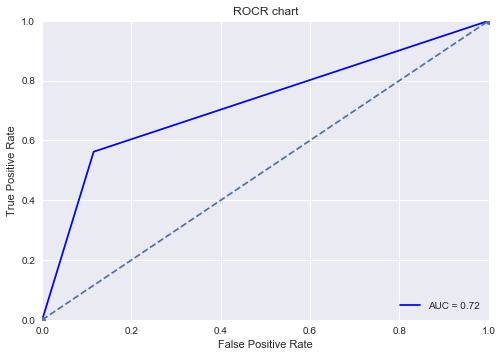

In [135]:
#ROC Chart
fpr, tpr, th = roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('ROCR chart')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


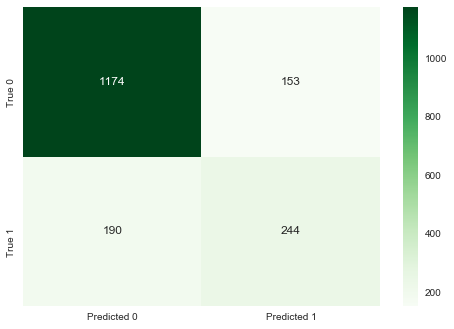

In [136]:
#Confusion Matrix
print('Confusion Matrix')
cf = metrics.confusion_matrix(test_y,classes)
lbl1 = ['Predicted 0','Predicted 1']
lbl2 = ['True 0','True 1']
sns.heatmap(cf, annot=True, cmap="Greens",fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show();

In [137]:
import statsmodels.api as sm
model = sm.GLM(y, x, family = sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7029
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2961.6
Date:                Sat, 13 Jan 2018   Deviance:                       5923.3
Time:                        12:17:44   Pearson chi2:                 7.34e+03
No. Iterations:                     6                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
SeniorCitizen        0.2043      0.084      2.434      0.015       0.040       0.369
Dependents          -0.2520      0

In [ ]:
#Decision Tree

In [170]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "gini",max_depth=2)
dt.fit(train_x,train_y)
classes  =dt.predict(test_x)
auc = metrics.roc_auc_score(test_y,classes)
auc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

0.75500331644435492

In [171]:
#Plot the tree
import pydotplus as pydot
from sklearn import tree
with open("treepic.txt","w") as x:
    x = tree.export_graphviz(dt, out_file=x)

In [172]:
import graphviz

In [173]:
#dot_data = tree.export_graphviz(dt, out_file=None,feature_names=train_x, class_names=train_y, filled=True, rounded=True, special_characters=True)
#graph = graphviz.Source(dot_data)
#graph

In [164]:
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data,iris.target)

In [177]:
import graphviz

In [179]:
#dot_data = tree.export_graphviz(clf, out_file=None,feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
#graph = graphviz.Source(dot_data)
#graph

In [175]:
pwd

'C:\\Users\\Raceclass59'